In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import math
from scipy.signal import argrelextrema
import mplfinance as mpf
import matplotlib.pyplot as plt

In [2]:
def get_data(symbol, start_date, end_date):
    return yf.download(symbol, start=start_date, end=end_date)

def local_min_max(data, order=2):
    data['min'] = data.iloc[argrelextrema(data['Close'].values, np.less_equal, order=order)[0]]['Close']
    data['max'] = data.iloc[argrelextrema(data['Close'].values, np.greater_equal, order=order)[0]]['Close']
    return data

def detect_double_bottom(data, percent_diff_allowed=2):
    minima_df = data[data['min'].notnull()]
    minima_df['next_min'] = minima_df['min'].shift(-1)
    minima_df['diff_percent'] = abs((minima_df['min'] - minima_df['next_min']) / minima_df['min']) * 100
    double_bottoms = minima_df[minima_df['diff_percent'] <= percent_diff_allowed]
    return double_bottoms

def detect_double_top(data, percent_diff_allowed=2):
    maxima_df = data[data['max'].notnull()]
    maxima_df['next_max'] = maxima_df['max'].shift(-1)
    maxima_df['diff_percent'] = abs((maxima_df['max'] - maxima_df['next_max']) / maxima_df['max']) * 100
    double_tops = maxima_df[maxima_df['diff_percent'] <= percent_diff_allowed]
    return double_tops

def generate_signals(double_bottoms, double_tops):
    buy_signals = double_bottoms[['next_min']].assign(signal="Buy")
    sell_signals = double_tops[['next_max']].assign(signal="Sell")
    signals = pd.concat([buy_signals, sell_signals]).sort_index()
    return signals

# Get data
data = get_data("AAPL", "2018-04-01", "2023-03-31")

# Identify local minima and maxima
data = local_min_max(data)

# Detect patterns
double_bottoms = detect_double_bottom(data)
double_tops = detect_double_top(data)

# Generate signals
signals = generate_signals(double_bottoms, double_tops)
count=0
# print(signals)
for i in range(len(signals)):
  if(signals.iloc[i,1] == 'Buy'):
    count=count+1
print("Buy")
print(count)
print("Sell")
print(len(signals)-count)
signals = signals.reset_index()
print(signals)


[*********************100%***********************]  1 of 1 completed
Buy
73
Sell
65
          Date    next_min signal    next_max
0   2018-04-02   42.095001    Buy         NaN
1   2018-04-24   40.580002    Buy         NaN
2   2018-05-10         NaN   Sell   47.044998
3   2018-05-15   46.577499    Buy         NaN
4   2018-05-16         NaN   Sell   47.145000
..         ...         ...    ...         ...
133 2023-02-09  148.479996    Buy         NaN
134 2023-02-21  146.710007    Buy         NaN
135 2023-02-24  145.309998    Buy         NaN
136 2023-03-21         NaN   Sell  160.250000
137 2023-03-24         NaN   Sell  162.360001

[138 rows x 4 columns]


C:\Users\guddu\AppData\Local\Temp\ipykernel_16848\3938753775.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minima_df['next_min'] = minima_df['min'].shift(-1)
C:\Users\guddu\AppData\Local\Temp\ipykernel_16848\3938753775.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minima_df['diff_percent'] = abs((minima_df['min'] - minima_df['next_min']) / minima_df['min']) * 100
C:\Users\guddu\AppData\Local\Temp\ipykernel_16848\3938753775.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [3]:
double_bottoms

,Open,High,Low,Close,Adj Close,Volume,min,max,next_min,diff_percent
Date,,,,,,,,,,
2018-04-02,41.660000,42.235001,41.117500,41.669998,39.670021,150347200,41.669998,NaN,42.095001,1.019926
2018-04-24,41.417500,41.582500,40.305000,40.735001,38.779896,134768000,40.735001,NaN,40.580002,0.380505
2018-05-15,46.695000,46.767502,46.275002,46.610001,44.544029,94780800,46.610001,NaN,46.577499,0.069730
2018-05-18,46.797501,46.952499,46.532501,46.577499,44.512962,73190800,46.577499,NaN,46.717499,0.300573
2018-06-25,45.849998,46.230000,45.182499,45.542500,43.523830,126652400,45.542500,NaN,45.980000,0.960641
...,...,...,...,...,...,...,...,...,...,...
2022-11-29,144.289993,144.809998,140.350006,141.169998,140.760086,83763800,141.169998,NaN,140.940002,0.162921
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.674019,85438400,126.040001,NaN,125.019997,0.809270
2023-02-09,153.779999,154.330002,150.419998,150.869995,150.431915,56007100,150.869995,NaN,148.479996,1.584145


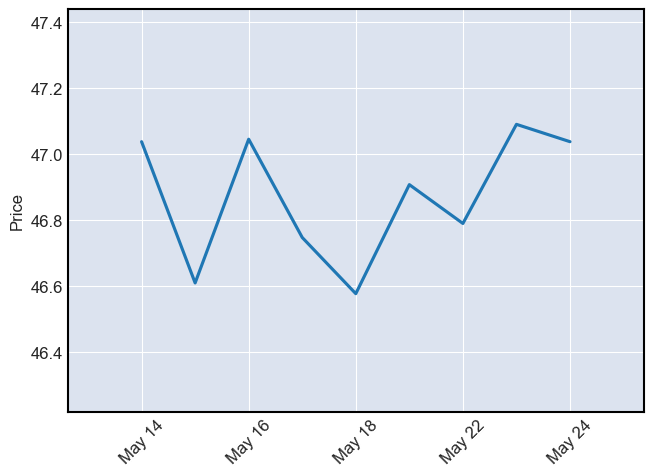

In [4]:
data1 = data.loc['2018-05-14' :'2018-05-24',:]
mpf.plot(data1,type='line')

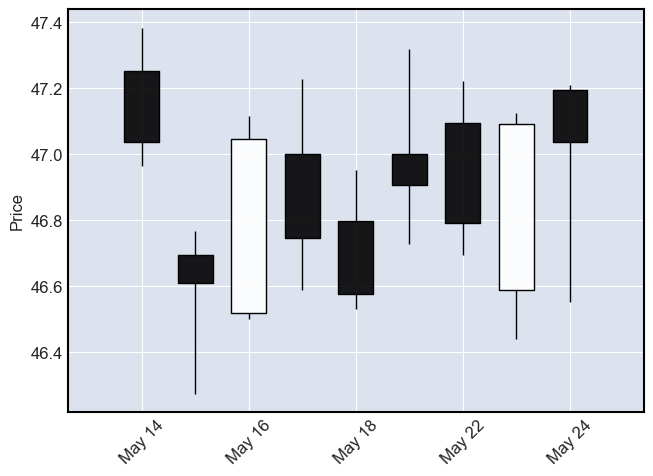

In [5]:
data1 = data.loc['2018-05-14' :'2018-05-24',:]
mpf.plot(data1,type='candle')

In [6]:
data['Typical Price'] = (data['Close']+data['Low']+data['High'])/3
data['SMA'] = data['Typical Price'].rolling(window=20).mean()
data['STD'] = data['Typical Price'].rolling(window=20).std()
data['Upper Band Bollinger'] = data['SMA'] + (data['STD'] * 2)
data['Lower Band Bollinger'] = data['SMA'] - (data['STD'] * 2)
data['Bollinger Signal'] = 'Stay'
for i in range(len(data)):
    if ((abs(data.iloc[i,11]-data.iloc[i,3])/(data.iloc[i,11])) < 0.01):
        data.iloc[i,13] = 'Sell'
    elif ((abs(data.iloc[i,3]-data.iloc[i,12])/(data.iloc[i,12]))< 0.03):
        data.iloc[i,13] = 'Buy'
count1 = 0  
count2 = 0
for i in range(len(data)):
  if(data.iloc[i,13] == 'Buy'):
    count1=count1+1
  elif(data.iloc[i,13] == 'Sell'):
    count2 = count2+1
print("Buy")
print(count1)
print("Sell")
print(count2) 
data = data.reset_index()

Buy
258
Sell
228


In [7]:
mergeddates = pd.merge(signals['Date'], data['Date'], on='Date')

In [8]:
data = data[data['Date'].isin(mergeddates['Date'])]
data = data.reset_index()
data = data.drop('index', axis=1)

In [9]:
data['Signal'] = signals['signal']
data.reset_index()
data

,Date,Open,High,Low,Close,Adj Close,Volume,min,max,Typical Price,SMA,STD,Upper Band Bollinger,Lower Band Bollinger,Bollinger Signal,Signal
0,2018-04-02,41.660000,42.235001,41.117500,41.669998,39.670021,150347200,41.669998,NaN,41.674166,NaN,NaN,NaN,NaN,Stay,Buy
1,2018-04-24,41.417500,41.582500,40.305000,40.735001,38.779896,134768000,40.735001,NaN,40.874167,NaN,NaN,NaN,NaN,Stay,Buy
2,2018-05-10,46.935001,47.592499,46.912498,47.509998,45.229713,111957200,NaN,47.509998,47.338332,43.513000,2.184479,47.881958,39.144042,Sell,Sell
3,2018-05-15,46.695000,46.767502,46.275002,46.610001,44.544029,94780800,46.610001,NaN,46.550835,43.952167,2.527982,49.008130,38.896203,Stay,Buy
4,2018-05-16,46.517502,47.115002,46.500000,47.044998,44.959743,76732400,NaN,47.044998,46.886667,44.073417,2.610513,49.294443,38.852390,Stay,Sell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.431915,56007100,150.869995,NaN,151.873332,143.413333,6.931131,157.275595,129.551072,Stay,Buy
134,2023-02-21,150.199997,151.300003,148.410004,148.479996,148.274902,58867200,148.479996,NaN,149.396667,149.175500,4.609696,158.394893,139.956107,Stay,Buy
135,2023-02-24,147.110001,147.190002,145.720001,146.710007,146.507355,55469600,146.710007,NaN,146.540003,150.065834,3.580500,157.226834,142.904833,Buy,Buy
136,2023-03-21,157.320007,159.399994,156.539993,159.279999,159.059982,73938300,NaN,159.279999,158.406662,151.051167,3.602343,158.255854,143.846480,Sell,Sell


In [10]:
data["Balance"] = 10000000
capital = 10000000
quantity = 0
x=0
for i in range(1,len(data)):
  if(data.iloc[i, 14] == 'Buy' and data.iloc[i, 15] == 'Buy'):
      quantity = quantity+abs((capital*0.65)/(data.iloc[i,4]))
      x=abs((capital*0.6)/(data.iloc[i,4]))
      capital=capital-x*data.iloc[i,4]
      data.iloc[i, 16] = capital+quantity*data.iloc[i,4]

  elif(data.iloc[i, 14] == 'Sell' and data.iloc[i, 15] == 'Sell'):
      capital=capital+abs(quantity*0.4)*data.iloc[i,4]
      quantity = quantity-abs(quantity*0.4)
      data.iloc[i,16]=capital+quantity*data.iloc[i,4]

  elif(data.iloc[i, 14] != data.iloc[i, 15]):
      data.iloc[i,16] = data.iloc[i-1,16]
  
    
      
print("Final Capital Left with Us")
print(capital+quantity*data.iloc[137,4])
print("Returns are in %")
print(((capital+quantity*data.iloc[137,4]-10000000)/(10000000))*100)

Final Capital Left with Us
26434036.428654425
Returns are in %
164.34036428654423


In [11]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,min,max,Typical Price,SMA,STD,Upper Band Bollinger,Lower Band Bollinger,Bollinger Signal,Signal,Balance
0,2018-04-02,41.660000,42.235001,41.117500,41.669998,39.670021,150347200,41.669998,NaN,41.674166,NaN,NaN,NaN,NaN,Stay,Buy,1.000000e+07
1,2018-04-24,41.417500,41.582500,40.305000,40.735001,38.779896,134768000,40.735001,NaN,40.874167,NaN,NaN,NaN,NaN,Stay,Buy,1.000000e+07
2,2018-05-10,46.935001,47.592499,46.912498,47.509998,45.229713,111957200,NaN,47.509998,47.338332,43.513000,2.184479,47.881958,39.144042,Sell,Sell,1.000000e+07
3,2018-05-15,46.695000,46.767502,46.275002,46.610001,44.544029,94780800,46.610001,NaN,46.550835,43.952167,2.527982,49.008130,38.896203,Stay,Buy,1.000000e+07
4,2018-05-16,46.517502,47.115002,46.500000,47.044998,44.959743,76732400,NaN,47.044998,46.886667,44.073417,2.610513,49.294443,38.852390,Stay,Sell,1.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.431915,56007100,150.869995,NaN,151.873332,143.413333,6.931131,157.275595,129.551072,Stay,Buy,2.482098e+07
134,2023-02-21,150.199997,151.300003,148.410004,148.479996,148.274902,58867200,148.479996,NaN,149.396667,149.175500,4.609696,158.394893,139.956107,Stay,Buy,2.482098e+07
135,2023-02-24,147.110001,147.190002,145.720001,146.710007,146.507355,55469600,146.710007,NaN,146.540003,150.065834,3.580500,157.226834,142.904833,Buy,Buy,2.460199e+07
136,2023-03-21,157.320007,159.399994,156.539993,159.279999,159.059982,73938300,NaN,159.279999,158.406662,151.051167,3.602343,158.255854,143.846480,Sell,Sell,2.635296e+07


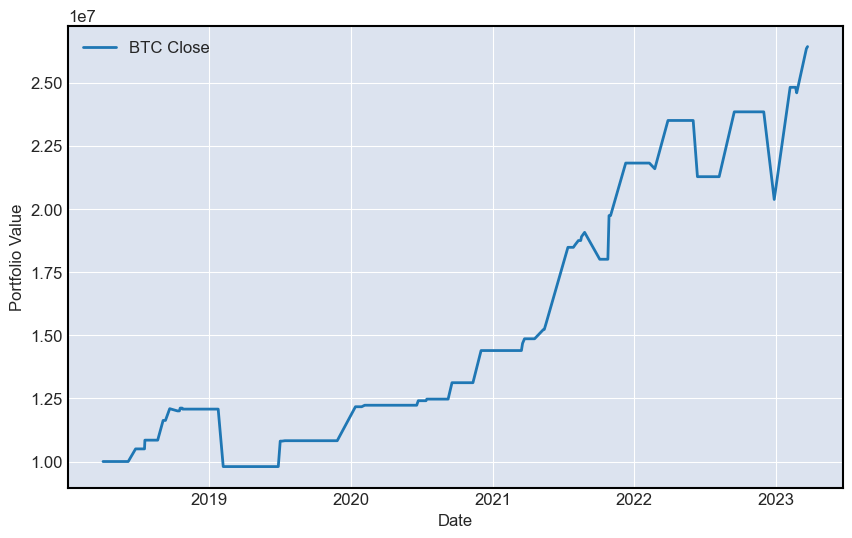

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Balance'], label='BTC Close')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(True)
plt.show()